In [1]:
import pandas as pd
import numpy as np

In [2]:
df_diab = pd.read_csv('diabetes.csv')

In [3]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diab.Outcome.unique()

array([1, 0])

In [5]:
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df_diab.shape

(768, 9)

In [7]:
X = df_diab.drop(['Outcome'],axis=1)
y = df_diab[['Outcome']]

In [8]:
np.random.seed(12345)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   stratify = y,
                                                   test_size=0.2,
                                                   random_state=12345)

In [11]:
X_train.shape

(614, 8)

In [12]:
X_test.shape

(154, 8)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense, Dropout, Input

In [104]:
model = Sequential()

In [105]:
X_train_scaled.shape[1]

8

In [106]:
model.add(Input(shape = (X_train_scaled.shape[1],)))

In [107]:
# First Hidden Layer - 128 neurons, Relu activation, L1 Regularizer for the Kernel
model.add(Dense(units=128,
                activation='relu',
                kernel_regularizer = tf.keras.regularizers.L1()
                #kernel_regularizer = tf.keras.regularizers.L2() #L2 Regularization
                #kernel_regularizer = tf.keras.regularizers.L1L2() #L1L2 - Elasticnet
         ))

In [108]:
model.add(Dropout(0.2))

In [109]:
# Second Hidden Layer - 64 neurons, Relu activation
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))

# Third Hidden Layer 32, relu
model.add(Dense(units=32, activation='relu'))

# Output layer - Sigmoid
model.add(Dense(units=1, activation='sigmoid'))

In [110]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1152      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trai

In [111]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [112]:
result = model.fit(X_train_scaled, 
                   y_train,
                   validation_data = (X_test_scaled, y_test),
                   epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 1.6499 - accuracy: 0.6531 - val_loss: 1.4980 - val_accuracy: 0.6818
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 1.4171 - accuracy: 0.7101 - val_loss: 1.2885 - val_accuracy: 0.7597
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1.2380 - accuracy: 0.7476 - val_loss: 1.1219 - val_accuracy: 0.7792
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0947 - accuracy: 0.7606 - val_loss: 0.9940 - val_accuracy: 0.7857
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.9747 - accuracy: 0.7801 - val_loss: 0.8900 - val_accuracy: 0.7727
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8903 - accuracy: 0.7671 - val_loss: 0.8011 - val_accuracy: 0.7987
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.8040 - accuracy: 0.7834 - val_loss: 0.7299 - val_accuracy: 0.7987
Epoch 8/100


In [117]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [119]:
confusion_matrix(y_pred=y_train_pred >= 0.5, 
                 y_true = y_train)

array([[353,  47],
       [ 65, 149]])

In [120]:
accuracy_score(y_pred=y_train_pred >= 0.5, 
               y_true = y_train)

0.8175895765472313

In [121]:
confusion_matrix(y_pred=y_test_pred >= 0.5, 
                 y_true = y_test)

array([[82, 18],
       [17, 37]])

In [122]:
accuracy_score(y_pred=y_test_pred >= 0.5, 
               y_true = y_test)

0.7727272727272727

In [123]:
history = pd.DataFrame(result.history)

In [124]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,1.649878,0.653094,1.498006,0.681818
1,1.417052,0.710098,1.288485,0.759740
2,1.238031,0.747557,1.121855,0.779221
3,1.094681,0.760586,0.993989,0.785714
4,0.974726,0.780130,0.890005,0.772727


In [125]:
import matplotlib.pyplot as plt

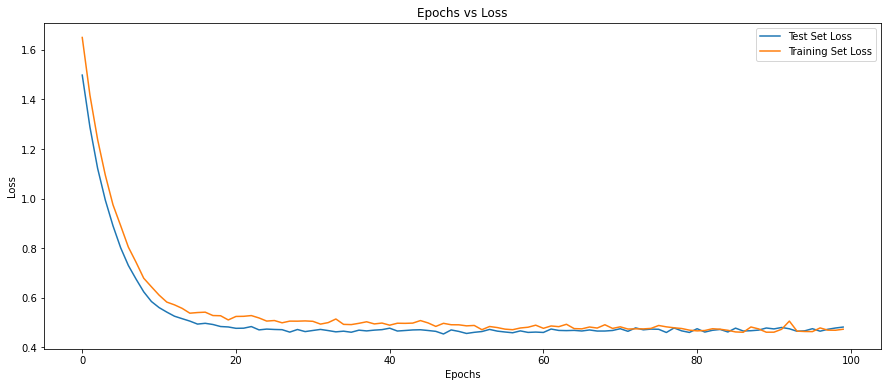

In [126]:
plt.figure(figsize = (15,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

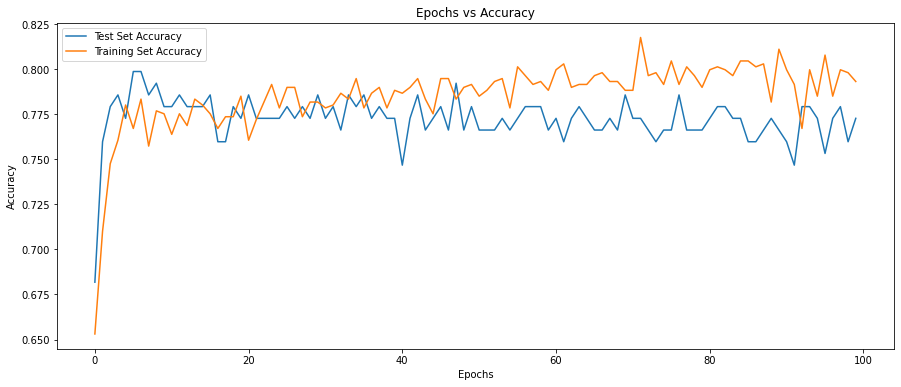

In [127]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
